<a href="https://colab.research.google.com/github/eschmidt39/Homework9_Schmidt/blob/main/Homework9_Schmidt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build models to predict the amount of incoming shortwave radiation and to categorize total incoming radiation into groups using clustering and classification techniques

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
fname = '/content/drive/MyDrive/FWE458 - Envir. Data Sci./Data_Sets/SW_with_AOD.csv'
data = pd.read_csv(fname)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SZA       AOD       COD  CLD_FRAC        UW         TO3  \
0      24.936783  1.172892  2.440000  0.286546  2.021502  311.419861   
1      34.865055  1.626954  4.630000  0.468832  4.859887  308.713379   
2      27.330978  1.095007  2.030000  0.301414  5.278558  293.322052   
3      20.361732  1.126541  5.500000  0.377019  4.856422  321.498199   
4      13.433228  0.725452  0.736076  0.075378  0.644262  295.448975   
...          ...       ...       ...       ...       ...         ...   
35219  37.315063  0.181112  2.360000  0.071185  2.312875  268.948242   
35220  64.573303  0.258045  0.392416  0.060352  0.893602  328.640442   
35221  61.829556  0.138252  0.233040  0.033619  2.335012  259.676788   
35222  67.391891  0.698632  1.368286  0.218022  0.462143  265.180176   
35223  34.609253  1.480052  3.470983  0.423863  2.025284  313.016113   

         Pressure    BSA    WSA   SW_direct  SW_diffuse  
0      959.085083  0.162  0.193  467.191650  300.820007  
1      968.427551  0.155  0.169  264.900024  385.293335  
2      988.040588  0.136  0.149  313.553314  321.538361  
3      977.610229  0.156  0.179  143.902298  501.073639  
4      882.321411  0.188  0.212  957.331665   79.003334  
...           ...    ...    ...         ...         ...  
35219  970.049805  0.146  0.171  474.672302  207.633331  
35220  988.746948  0.135  0.132  382.056671   74.483337  
35221  970.049805  0.146  0.171  115.962257  281.266663  
35222  811.828369  0.192  0.183  385.561645   50.876663  
35223  954.383789  0.194  0.224  631.874390  141.549988  

[35224 rows x 11 columns]

Data Preprocessing:

In [ ]:
#check for missing values or outliers - reasonable range for all variables without missing data
print("SZA", max(data['SZA']))
print("SZA", min(data['SZA']))
print("AOD", max(data['AOD']))
print("AOD", min(data['AOD']))
print("COD", max(data['COD']))
print("COD", min(data['COD']))
print("CLD_FRAC", max(data['CLD_FRAC']))
print("CLD_FRAC", min(data['CLD_FRAC']))
print("UW", max(data['UW']))
print("UW", min(data['UW']))
print("TO3", max(data['TO3']))
print("TO3", min(data['TO3']))
print("Pressure", max(data['Pressure']))
print("Pressure", min(data['Pressure']))
print("BSA", max(data['BSA']))
print("BAS", min(data['BSA']))
print("WSA", max(data['WSA']))
print("WSA", min(data['WSA']))
print("SW_direct", max(data['SW_direct']))
print("SW_direct", min(data['SW_direct']))
print("SW_diffuse", max(data['SW_diffuse']))
print("SW_diffuse", min(data['SW_diffuse']))

SZA 69.99932861
SZA 0.325057983
AOD 5.267974899
AOD 0.001963017
COD 16.27
COD 3.08e-05
CLD_FRAC 0.645195663
CLD_FRAC 0.0
UW 6.701678276
UW 0.093588173
TO3 488.9841003
TO3 190.3525085
Pressure 1013.25
Pressure 762.2340698
BSA 0.746
BAS 0.006
WSA 0.724
WSA 0.006
SW_direct 1116.736084
SW_direct 0.001666667
SW_diffuse 842.5145264
SW_diffuse 0.0


In [ ]:
#create SW_total column
data['SW_total'] = data['SW_direct'] + data['SW_diffuse']
data

SZA       AOD       COD  CLD_FRAC        UW         TO3  \
0      24.936783  1.172892  2.440000  0.286546  2.021502  311.419861   
1      34.865055  1.626954  4.630000  0.468832  4.859887  308.713379   
2      27.330978  1.095007  2.030000  0.301414  5.278558  293.322052   
3      20.361732  1.126541  5.500000  0.377019  4.856422  321.498199   
4      13.433228  0.725452  0.736076  0.075378  0.644262  295.448975   
...          ...       ...       ...       ...       ...         ...   
35219  37.315063  0.181112  2.360000  0.071185  2.312875  268.948242   
35220  64.573303  0.258045  0.392416  0.060352  0.893602  328.640442   
35221  61.829556  0.138252  0.233040  0.033619  2.335012  259.676788   
35222  67.391891  0.698632  1.368286  0.218022  0.462143  265.180176   
35223  34.609253  1.480052  3.470983  0.423863  2.025284  313.016113   

         Pressure    BSA    WSA   SW_direct  SW_diffuse     SW_total  
0      959.085083  0.162  0.193  467.191650  300.820007   768.011658  
1      968.427551  0.155  0.169  264.900024  385.293335   650.193359  
2      988.040588  0.136  0.149  313.553314  321.538361   635.091675  
3      977.610229  0.156  0.179  143.902298  501.073639   644.975937  
4      882.321411  0.188  0.212  957.331665   79.003334  1036.334999  
...           ...    ...    ...         ...         ...          ...  
35219  970.049805  0.146  0.171  474.672302  207.633331   682.305633  
35220  988.746948  0.135  0.132  382.056671   74.483337   456.540008  
35221  970.049805  0.146  0.171  115.962257  281.266663   397.228920  
35222  811.828369  0.192  0.183  385.561645   50.876663   436.438309  
35223  954.383789  0.194  0.224  631.874390  141.549988   773.424377  

[35224 rows x 12 columns]

In [ ]:
#create SW_total_category column with SW_total quartiles
quartiles = pd.qcut((data['SW_total']), 4, labels = ['Q1', 'Q2', 'Q3', 'Q4'])

data['SW_total_category'] = quartiles
data

SZA       AOD       COD  CLD_FRAC        UW         TO3  \
0      24.936783  1.172892  2.440000  0.286546  2.021502  311.419861   
1      34.865055  1.626954  4.630000  0.468832  4.859887  308.713379   
2      27.330978  1.095007  2.030000  0.301414  5.278558  293.322052   
3      20.361732  1.126541  5.500000  0.377019  4.856422  321.498199   
4      13.433228  0.725452  0.736076  0.075378  0.644262  295.448975   
...          ...       ...       ...       ...       ...         ...   
35219  37.315063  0.181112  2.360000  0.071185  2.312875  268.948242   
35220  64.573303  0.258045  0.392416  0.060352  0.893602  328.640442   
35221  61.829556  0.138252  0.233040  0.033619  2.335012  259.676788   
35222  67.391891  0.698632  1.368286  0.218022  0.462143  265.180176   
35223  34.609253  1.480052  3.470983  0.423863  2.025284  313.016113   

         Pressure    BSA    WSA   SW_direct  SW_diffuse     SW_total  \
0      959.085083  0.162  0.193  467.191650  300.820007   768.011658   
1      968.427551  0.155  0.169  264.900024  385.293335   650.193359   
2      988.040588  0.136  0.149  313.553314  321.538361   635.091675   
3      977.610229  0.156  0.179  143.902298  501.073639   644.975937   
4      882.321411  0.188  0.212  957.331665   79.003334  1036.334999   
...           ...    ...    ...         ...         ...          ...   
35219  970.049805  0.146  0.171  474.672302  207.633331   682.305633   
35220  988.746948  0.135  0.132  382.056671   74.483337   456.540008   
35221  970.049805  0.146  0.171  115.962257  281.266663   397.228920   
35222  811.828369  0.192  0.183  385.561645   50.876663   436.438309   
35223  954.383789  0.194  0.224  631.874390  141.549988   773.424377   

      SW_total_category  
0                    Q3  
1                    Q3  
2                    Q2  
3                    Q3  
4                    Q4  
...                 ...  
35219                Q3  
35220                Q1  
35221                Q1  
35222                Q1  
35223                Q3  

[35224 rows x 13 columns]

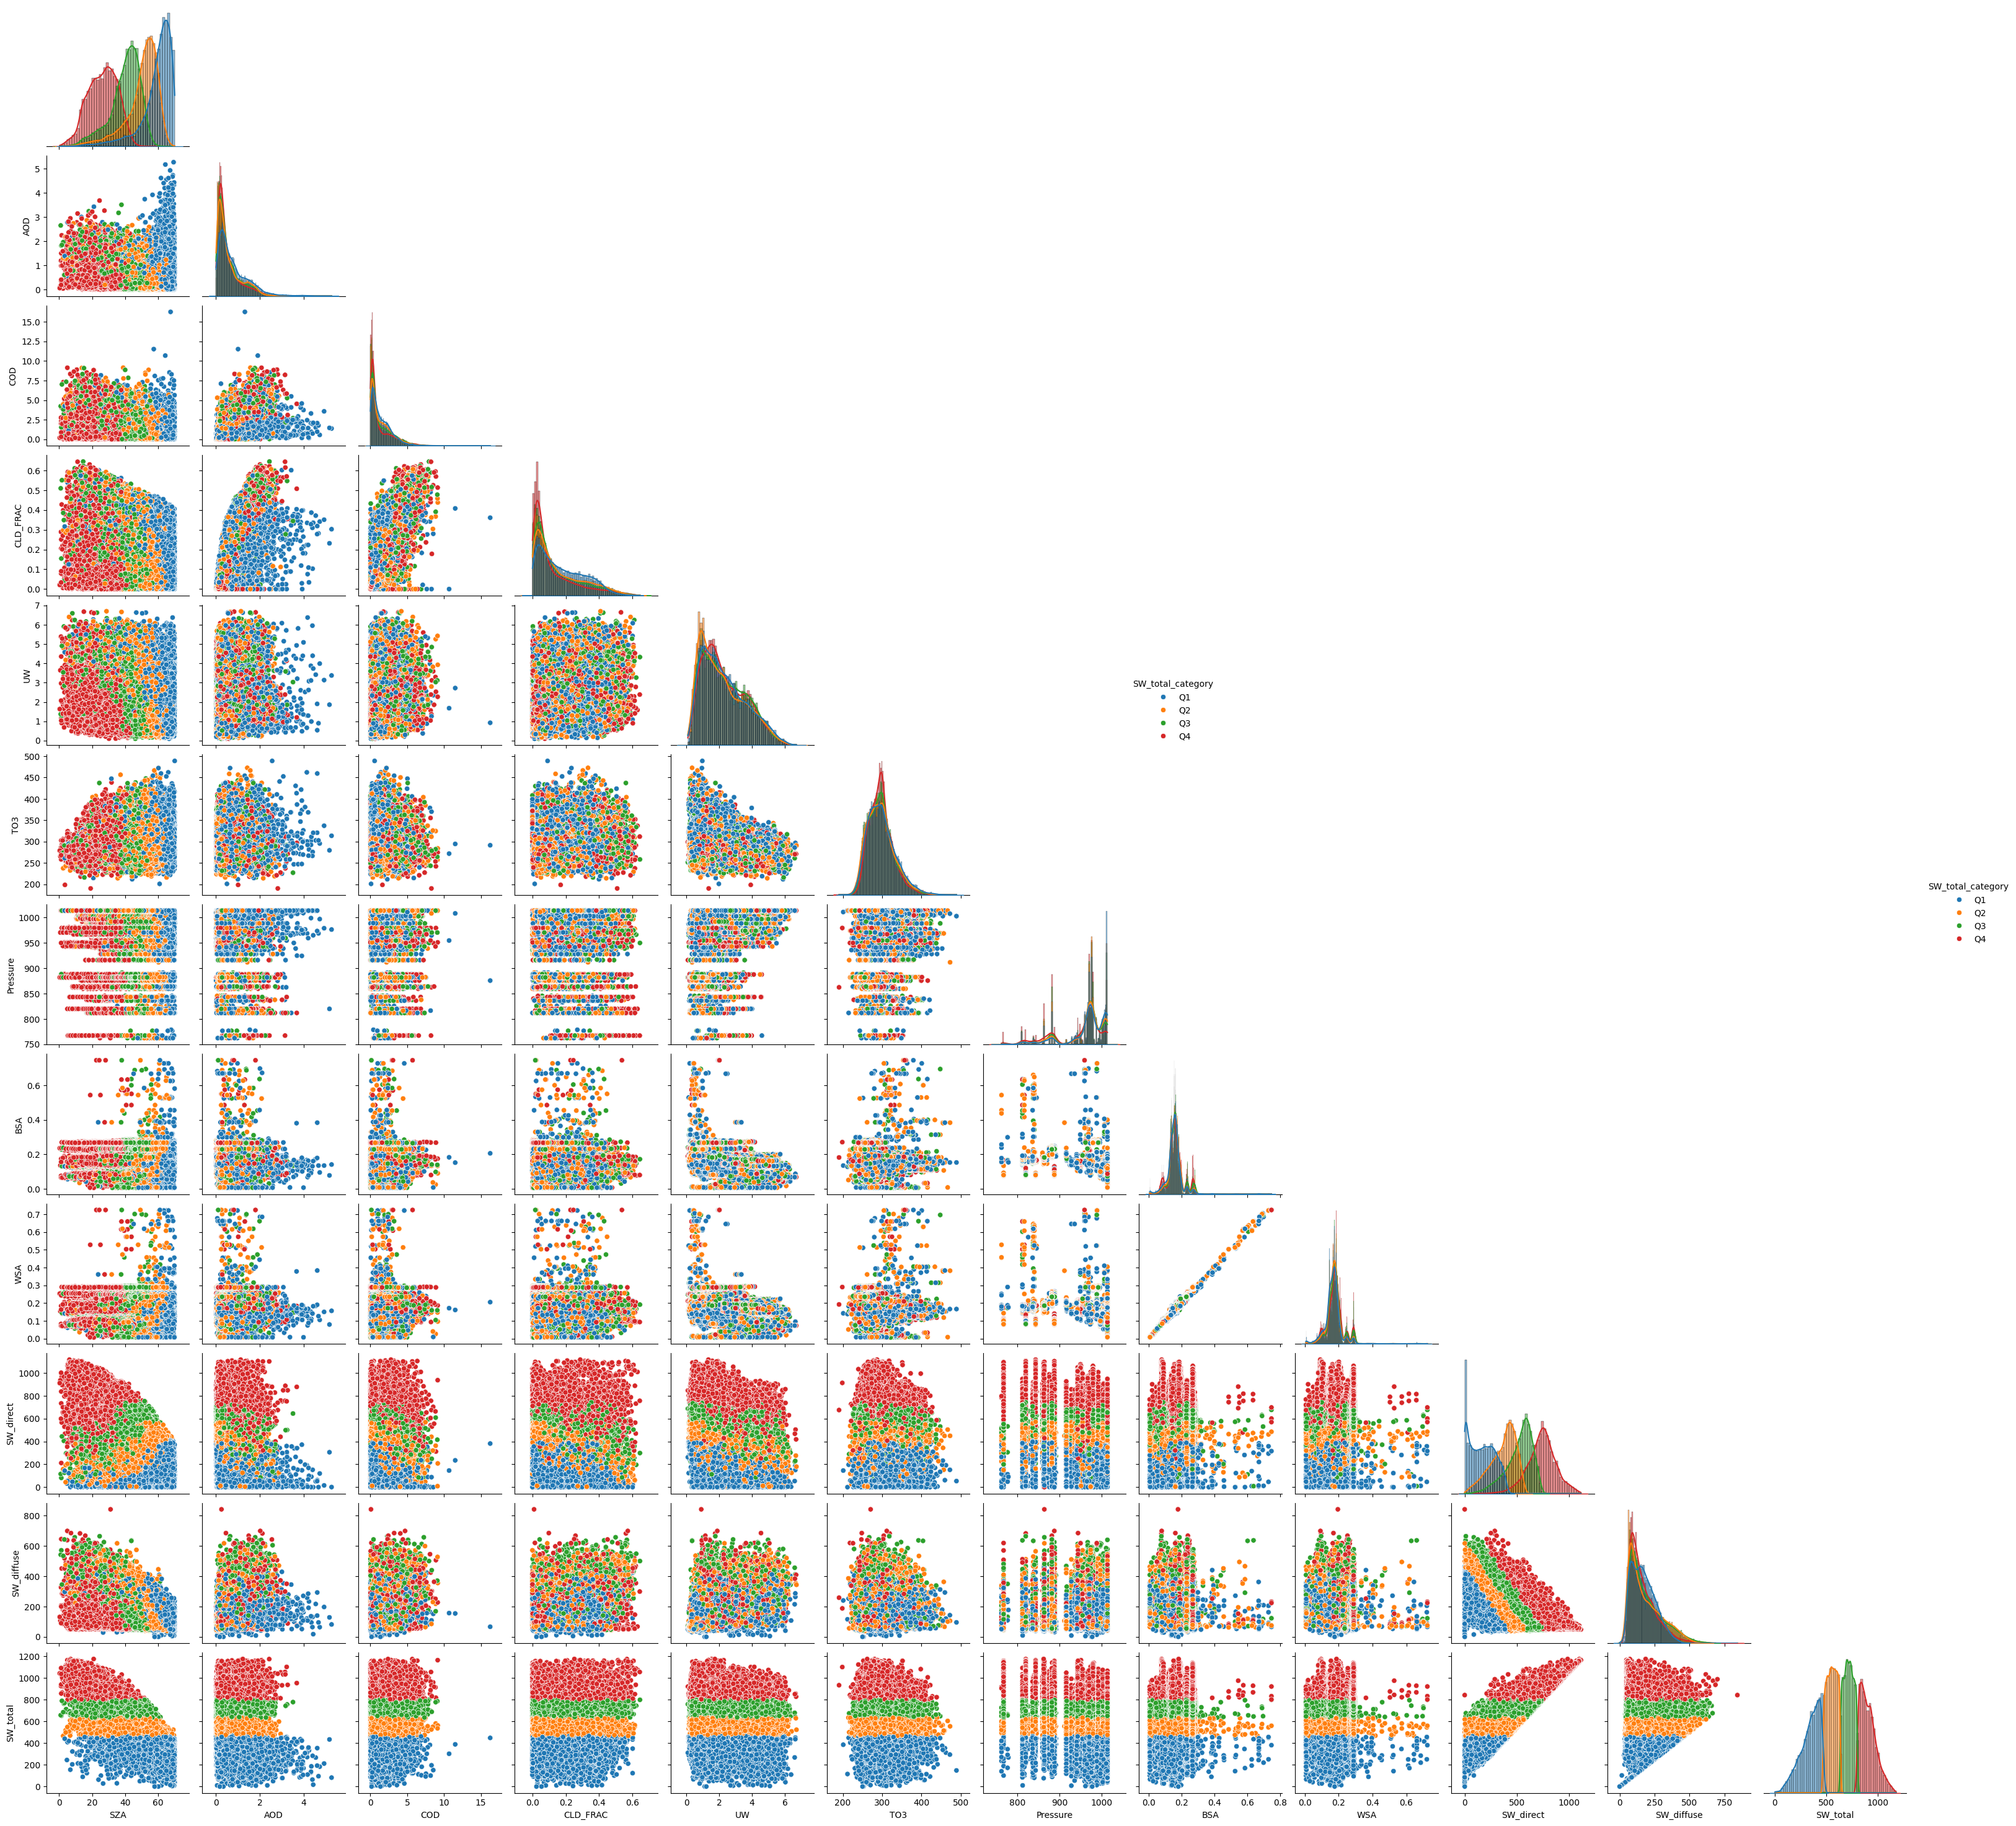

In [ ]:
#visualize using sns pairplot with all variables and SW color-coded with categories
h = sns.pairplot(data, hue='SW_total_category', corner=True)
h.map_lower(sns.scatterplot)
h.map_diag(sns.histplot, kde=True)

h.add_legend(frameon=False)
h.legend.set_bbox_to_anchor((0.6, 0.6))

Unsupervised Learning: K-Means Clustering

In [ ]:
SZA = data['SZA'].to_frame()
SZA

SZA
0      24.936783
1      34.865055
2      27.330978
3      20.361732
4      13.433228
...          ...
35219  37.315063
35220  64.573303
35221  61.829556
35222  67.391891
35223  34.609253

[35224 rows x 1 columns]

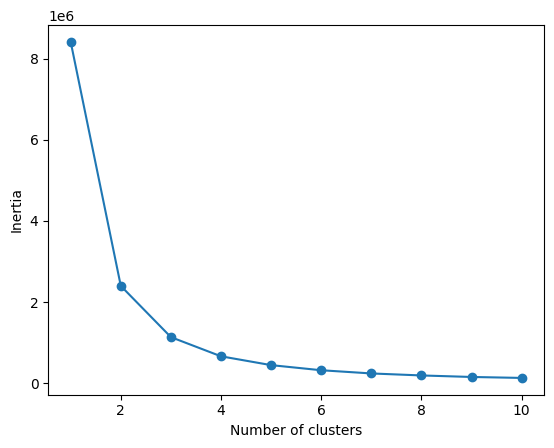

In [ ]:
#SZA elbow method
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(SZA)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#k = 3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(SZA)
y_kmeans = kmeans.predict(SZA)

In [ ]:
AOD = data['AOD'].to_frame()
AOD

AOD
0      1.172892
1      1.626954
2      1.095007
3      1.126541
4      0.725452
...         ...
35219  0.181112
35220  0.258045
35221  0.138252
35222  0.698632
35223  1.480052

[35224 rows x 1 columns]

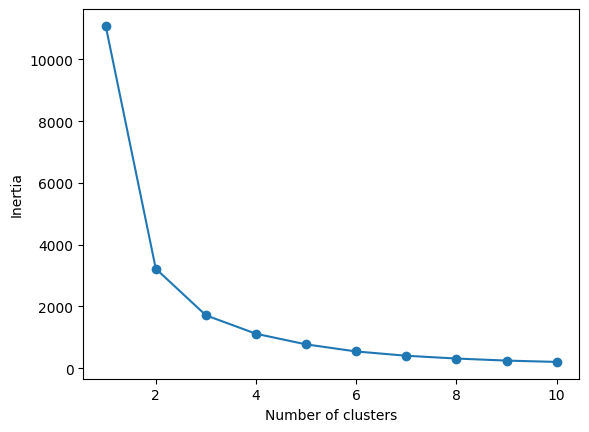

In [ ]:
#AOD elbow method
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(AOD)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#k = 3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(AOD)
y_kmeans = kmeans.predict(AOD)

Supervised Learning: Regression and Classification

In [ ]:
#decision tree regression
X = data[["SZA", "AOD", "COD", "CLD_FRAC", "UW", "TO3", "Pressure", "BSA", "WSA"]]
y = data['SW_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

treemodel = DecisionTreeRegressor(max_depth = 4)

treemodel.fit(X_train, y_train)

ypred_train = treemodel.predict(X_train)
ypred_test = treemodel.predict(X_test)

print(tree.export_text(treemodel))

|--- feature_0 <= 47.45
|   |--- feature_0 <= 32.56
|   |   |--- feature_3 <= 0.12
|   |   |   |--- feature_4 <= 2.24
|   |   |   |   |--- value: [945.06]
|   |   |   |--- feature_4 >  2.24
|   |   |   |   |--- value: [867.35]
|   |   |--- feature_3 >  0.12
|   |   |   |--- feature_6 <= 921.79
|   |   |   |   |--- value: [912.02]
|   |   |   |--- feature_6 >  921.79
|   |   |   |   |--- value: [760.74]
|   |--- feature_0 >  32.56
|   |   |--- feature_3 <= 0.13
|   |   |   |--- feature_0 <= 39.51
|   |   |   |   |--- value: [796.14]
|   |   |   |--- feature_0 >  39.51
|   |   |   |   |--- value: [710.36]
|   |   |--- feature_3 >  0.13
|   |   |   |--- feature_0 <= 38.88
|   |   |   |   |--- value: [681.77]
|   |   |   |--- feature_0 >  38.88
|   |   |   |   |--- value: [610.28]
|--- feature_0 >  47.45
|   |--- feature_0 <= 59.87
|   |   |--- feature_0 <= 53.78
|   |   |   |--- feature_3 <= 0.13
|   |   |   |   |--- value: [608.09]
|   |   |   |--- feature_3 >  0.13
|   |   |   |   |--- 

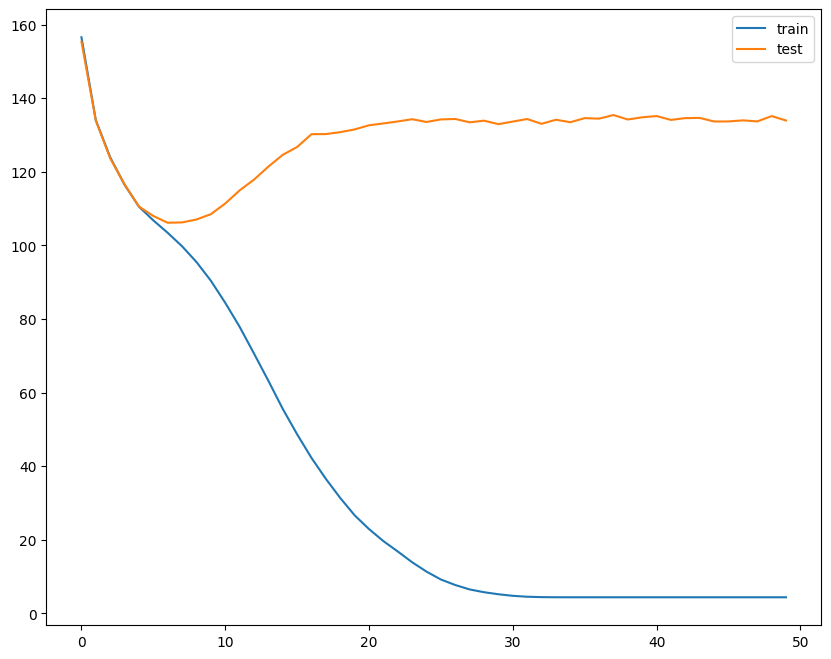

In [ ]:
#decision tree regresssor evaluation
train_err = np.zeros(50)
test_err = np.zeros(50)

for i in range(0,50):
  treemodel = DecisionTreeRegressor(max_depth = i+1)
  treemodel.fit(X_train, y_train)
  ypred_train = treemodel.predict(X_train)
  ypred_test = treemodel.predict(X_test)
  train_err[i] = np.sqrt(np.mean((y_train-ypred_train)**2))
  test_err[i] = np.sqrt(np.mean((y_test-ypred_test)**2))

fig = plt.figure(figsize=(10,8))

plt.plot(train_err)
plt.plot(test_err)
plt.legend(['train','test'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


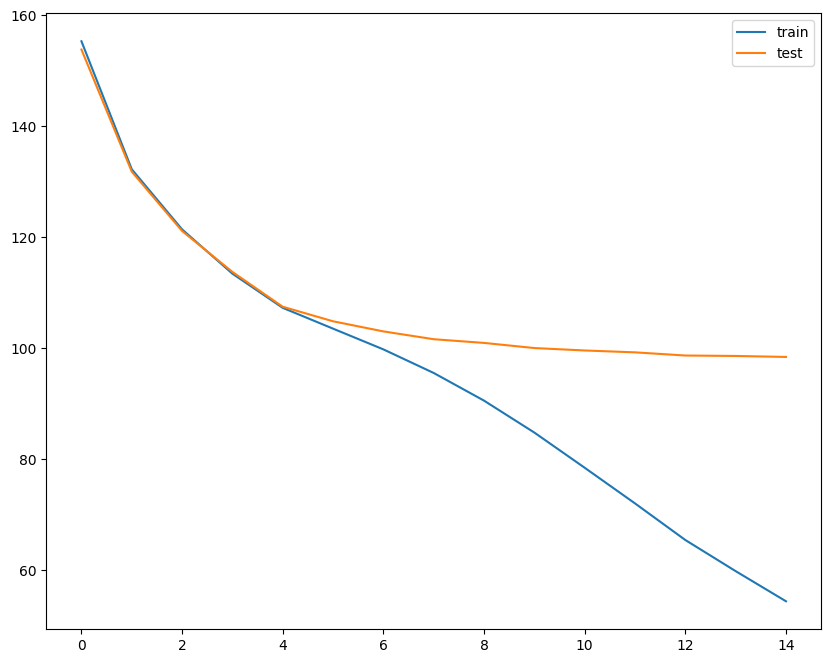

In [ ]:
#random forest regressor and evaluation
train_err = np.zeros(15)
test_err = np.zeros(15)

for i in range (0,15):
  print(i)
  forest = RandomForestRegressor(100, max_depth=i+1)
  forest.fit(X_train, y_train)
  ypred_train = forest.predict(X_train)
  ypred_test = forest.predict(X_test)
  train_err[i] = np.sqrt(np.mean((y_train-ypred_train)**2))
  test_err[i] = np.sqrt(np.mean((y_test-ypred_test)**2))

fig = plt.figure(figsize=(10,8))
plt.plot(train_err)
plt.plot(test_err)
plt.legend(['train','test'])

In [ ]:
#random forest is better at predicting the test data, and the decision forest has less than 10% train data error causing overfitting

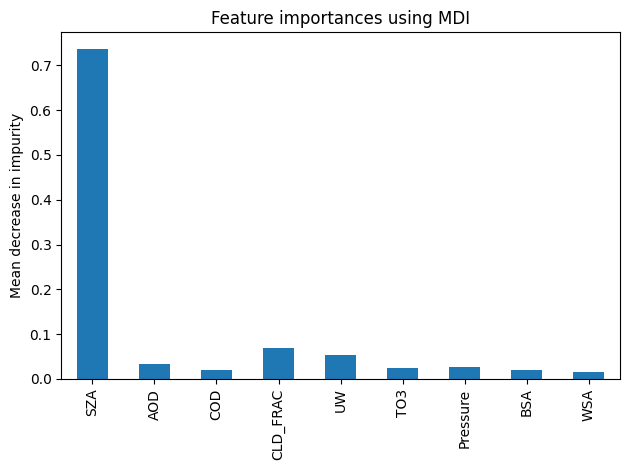

In [ ]:
importances = forest.feature_importances_
importances

feature_names = ["SZA", "AOD", "COD", "CLD_FRAC", "UW", "TO3", "Pressure", "BSA", "WSA"]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#in the random forest, SZA is the most important feature to predict SW_total, the second most important is CLD_FRACT and UW after that

Supervised Learning: Classification

In [ ]:
#KNeighbors Classifier
X = data[["SZA", "AOD", "COD", "CLD_FRAC", "UW", "TO3", "Pressure", "BSA", "WSA"]]
y = data['SW_total_category']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain,ytrain)
ypred = knn.predict(Xtest)

print(ypred)
print(ytest)
print(knn.score(Xtest,ytest))

['Q3' 'Q4' 'Q1' ... 'Q4' 'Q1' 'Q2']
29701    Q4
2932     Q4
34473    Q1
23257    Q3
27975    Q4
         ..
11420    Q4
3027     Q2
18993    Q4
15687    Q2
793      Q2
Name: SW_total_category, Length: 7045, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']
0.6435770049680625


In [ ]:
#accuracy, precision, recall, and confusion matrix
confusion_matrix = metrics.confusion_matrix(ytest,ypred)
confusion_matrix

array([[1246,  386,   98,   34],
       [ 436,  896,  323,   91],
       [ 141,  329, 1000,  290],
       [  48,   76,  259, 1392]])

In [ ]:
TP = 1246+896+1000+1392
TN = (896+3232+91+329+1000+290+76+259+1392) + (1246+ 98+34+141+1000+290+48+259+1392)+(1246+386+34+436+896+91+48+76+1392)+(1246+386+98+436+896+323+141+329+1000)
FP = (436+141+48)+(386+329+76)+(98+323+259)+(34+91+290)
FN = (386+98+34)+(436+323+91)+(141+329+290)+(48+76+259)

accuracy = (TP + TN)/(TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
F1 = 2*(precision*recall)/(precision+recall)

print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recalll:', recall)
print('F1 Score:', F1)

Accuracy: 0.8384637653189231
Precision: 0.6435770049680625
Recalll: 0.6435770049680625
F1 Score: 0.6435770049680625


In [ ]:
#Gaussian NB
model = GaussianNB()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

print(ypred)
print(ytest)

['Q4' 'Q3' 'Q1' ... 'Q4' 'Q2' 'Q2']
29701    Q4
2932     Q4
34473    Q1
23257    Q3
27975    Q4
         ..
11420    Q4
3027     Q2
18993    Q4
15687    Q2
793      Q2
Name: SW_total_category, Length: 7045, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']


In [ ]:
#accuracy, precision, recall, and confusion matrix
confusion_matrix = metrics.confusion_matrix(ytest,ypred)
confusion_matrix

array([[1244,  384,  109,   27],
       [ 295, 1059,  297,   95],
       [  43,  457,  957,  303],
       [   4,    5,  396, 1370]])

In [ ]:
TP = 1244+1059+957+1370
TN = (1059+297+95+457+957+303+5+396+1370)+(1244+109+27+43+957+303+4+396+1370)+(1244+384+27+295+1059+95+4+5+1370)+(1244+384+109+295+1059+297+43+457+957)
FP = (295+43+4)+(384+457+5)+(109+297+396)+(27+95+303)
FN = (384+109+27)+(295+297+95)+(43+457+303)+(4+5+396)

accuracy = (TP + TN)/(TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
F1 = 2*(precision*recall)/(precision+recall)

print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recalll:', recall)
print('F1 Score:', F1)

Accuracy: 0.8286018452803406
Precision: 0.6572036905606813
Recalll: 0.6572036905606813
F1 Score: 0.6572036905606813


Both models have very similar accuracies, precisions, recalls, and F1 scores, making it difficult to determine which is a "better" model. The KNeighbors accuracy was higher by about 0.01 and the GaussianNB precision, recall, and F1 score was higher by about 0.14 for each. This difference by about 1% for each score makes it difficult to determine which model is better at making predictions for SW total classifications.